**Agentic Search Tools:**

A very common tool of Agent is search – let us go into the details of why Agentic Search is different from common search and understand how an Agent might use the search tool.

In the absence of Search tool and with zero shot learning, the LLM will receive the response and based on the static weights of the model, it will provide the response. As one may know, there are limitations to this process:

•	It will not be able to answer queries for which the training data is not available.
•	In man cases, we might want to know the source of information provided in the result.





When a prompt is received by the Agent, the Agent then decides to call the search tool and then the information found is returned to the Agent – the workflow is sketched below:

Let us understand what happens internally in the Trivily tool. If the Agent decides that it will have to send the query to the search tool, the first step it would take is to understand the question and divide the question into sub-questions if needed as shown below.

Figure

Then for each sub query, search tool finds the best result choosing from multiple search results.

For example: if we ask the question, what is the weather like in San Francisco, the search tool will use the weather API For getting the search result. The job doesn’t end just by finding the correct source. The search tool will then have to extract the relevant from the source.

This is done by chunking the source, embedding the chunks and then doing a quick vector search to retrieve the top k chunks. After retrieving the data from the source, the search tool will score the results and will filter out the less relevant results.

The code in the Colab notebook demonstrates the Tivoli search process as follows:

1)	We first import the library

2)	We load the Tivoli API key

3)	We create the Tivoli client imported from the Tivoli Library

4)	After creating the connecvtion we list it

5)	We run a search asking about Nvidia’s new Blackwell GPU

6)	We get a simple accurate answer

Let us now try and attempt this with regular search:

7)	The query this time is

Figure 3:18 of 5:20

8)	We import the DuckDuck go search and through regular search get the response.

9)	We create a function which scrapes the data using BeautifulSoup to extract the html and do parsing

10)	It may be noticed that using Tivoli tool we geta  simple json with a lot more information about the weather.


In [ ]:
import os
os.environ["PYTHONWARNINGS"] = "ignore::DeprecationWarning"

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)




In [ ]:
# 1. Before undestanding how Agentic Serach works, let us see how an Agent
# might use it.

# 2. See figure below

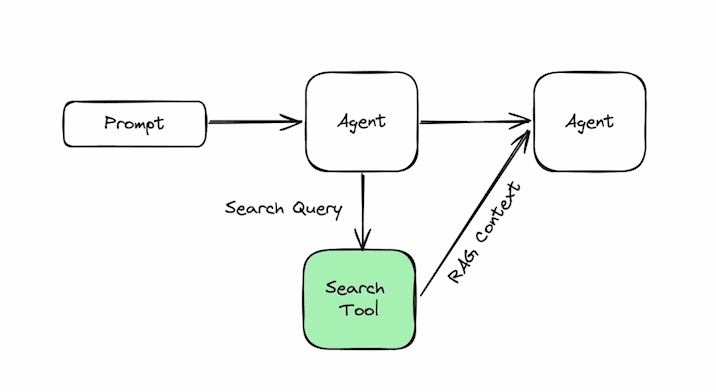

In [ ]:
# 3) In zero shot learning, an Agent will receive a prompt and
# will produce an answer based on static weights of the model

# 4) The tarinig data is limited

# 5) You might not be able to ask about scores from a game last
# night

# 6) In many use cases, you will wantt o know the
# sources of the infromation provided in the result.

# 7) Looking at the figure above, for the prompt is received by the Agent which
# then decides to call a search tool, the information found is returned to
# the Agent

# 8) Let us see what happend internally within the Tivily Tool



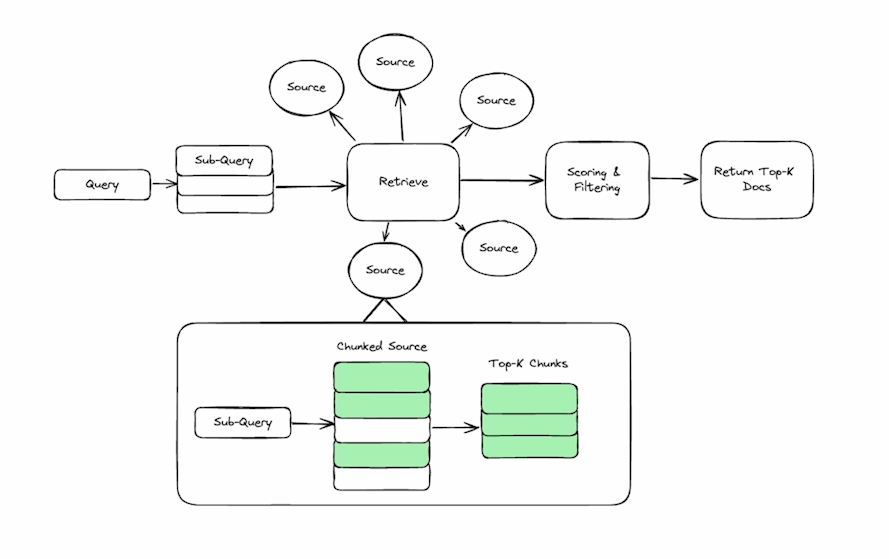

In [ ]:
# 9) If the Agent decides that it will send the query to the
# search tool, the Agent will understand the question and
# divide into a series of sub questions

# 10) For each query, the search tool will have to
# find the best search chosing from multiple integrations

# 11) Tge search tool chunks the source and runs a vector search to
# return the top-k chunks

# 12) After retrieving the data from the source, the search tool will
# score the results and filter out the less relevant information

# 13) Lets go to code

In [ ]:
#CODE

# 1. Import the libraries and do the initial connection to the search tool

# 2. We load in the env variables we gotta use
# 3. We have also loaded the Tavily API key

!pip install tavily-python
import os
import openai
from tavily import TavilyClient
os.environ["OPENAI_API_KEY"] = ""
openai.api_key = os.environ['OPENAI_API_KEY']
os.environ["TAVILY_API_KEY"] = ""

In [ ]:
# 4. Let's do the connection

# 5. We create the Tavily Client which we imported from the Tavily
# Library

client = TavilyClient(api_key=os.environ.get("TAVILY_API_KEY"))


In [ ]:
# 6. After creating the initial connection, lets test
# it out

# run search
result = client.search("What is in Nvidia's new Blackwell GPU?",
                       include_answer=True)

# print the answer
result["answer"]

'The Blackwell GPU features a second-generation Transformer Engine, confidential computing, and advanced NVLink. It is designed for generative AI and large-scale AI models.'

In [ ]:
# 7. Lets taken another example to see the difference
# between regular search tool and Agentic Search tool

# 8. Lets create a simple query with weather in a
# certain location

import os
os.environ["PYTHONWARNINGS"] = "ignore::DeprecationWarning"

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

city = "Birmingham"

query = f"""
    what is the current weather in {city}?
    Should I travel there today?
"""

In [ ]:
import os
os.environ["PYTHONWARNINGS"] = "ignore::DeprecationWarning"

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


import requests
from bs4 import BeautifulSoup


In [ ]:
# 9. Let us attempt it with regualr search
# 10. Lets do a DuckDuckGo Search
# 11. We will do a regular search, get the links
# 12. Links will lead you to the answer.
import os
os.environ["PYTHONWARNINGS"] = "ignore::DeprecationWarning"

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

!pip install ddgs
import requests
from bs4 import BeautifulSoup
from duckduckgo_search import DDGS
import re

ddg = DDGS()

def search(query, max_results=6):

    results = ddg.text(query, max_results=max_results)
    return [i["href"] for i in results]






/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/tmp/ipython-input-2718906726.py:17: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  ddg = DDGS()
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
warnings.filterwarnings(action="ignore",
  message=r"datetime.datetime.utcnow\(\) is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now\(datetime.UTC\).")

for i in search(query):
    print(i)


https://weather.com/weather/today/l/Birmingham+AL?canonicalCityId=b8bdae3307e8594c991ff78a30dbc55b
https://www.accuweather.com/en/us/birmingham/35203/weather-today/346630
https://forecast.weather.gov/MapClick.php?lat=33.5228587&lon=-86.8077052
https://www.localconditions.com/us/birmingham/alabama/weather/
https://www.msn.com/en-us/weather/forecast/in-Birmingham,AL?loc=eyJsIjoiQmlybWluZ2hhbSIsInIiOiJBTCIsInIyIjoiSmVmZmVyc29uIENvLiIsImMiOiJVbml0ZWQgU3RhdGVzIiwiaSI6IlVTIiwiZyI6ImVuLXVzIiwieCI6Ii04Ni45MDM5OTkzMjg2MTMyOCIsInkiOiIzMy40NDIwMDEzNDI3NzM0NCJ9
https://www.weatherforyou.com/report/birmingham-al


In [ ]:
# 13. As seen above, we did get the results
# 14. But this is not what the Agent needs.
# 15. We will havve to scrape the data from the first url
# 16. We will get the results.
# 17. We will use Beautiful Soup to extract data

def scrape_weather_info(url):
    """Scrape content from the given URL"""
    if not url:
        return "Weather information could not be found."

    # fetch data
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the webpage."

    # parse result
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# use DuckDuckGo to find a websites and take the first result
url = search(query)[0]

# scrape first website
soup = scrape_weather_info(url)

print(f"Website: {url}\n\n")
print(soup)


Website: https://weather.com/weather/today/l/Birmingham+AL?canonicalCityId=b8bdae3307e8594c991ff78a30dbc55b


<!DOCTYPE html>
<html dir="ltr" lang="en-US"><head>
<meta charset="utf-8" data-react-helmet="true"/><meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/><meta content="max-image-preview:large" data-react-helmet="true" name="robots"/><meta content="index, follow" data-react-helmet="true" name="robots"/><meta content="origin" data-react-helmet="true" name="referrer"/><meta content="Today’s and tonight’s Birmingham, AL weather forecast, weather conditions and Doppler radar from The Weather Channel and Weather.com" data-react-helmet="true" name="description"/><meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/><meta content="/daybreak-today/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/><meta content="#ffffff" data-react-helmet="true" name="theme-co

In [ ]:
# 18. We next use Agentic search tool
# run search
result = client.search(query, max_results=1)

# print first result
data = result["results"][0]["content"]

print(data)

{'location': {'name': 'Birmingham', 'region': 'West Midlands', 'country': 'United Kingdom', 'lat': 52.4853, 'lon': -1.8615, 'tz_id': 'Europe/London', 'localtime_epoch': 1756150134, 'localtime': '2025-08-25 20:28'}, 'current': {'last_updated_epoch': 1756149300, 'last_updated': '2025-08-25 20:15', 'temp_c': 24.1, 'temp_f': 75.4, 'is_day': 0, 'condition': {'text': 'Sunny', 'icon': '//cdn.weatherapi.com/weather/64x64/night/113.png', 'code': 1000}, 'wind_mph': 9.4, 'wind_kph': 15.1, 'wind_degree': 186, 'wind_dir': 'S', 'pressure_mb': 1010.0, 'pressure_in': 29.83, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 41, 'cloud': 0, 'feelslike_c': 24.9, 'feelslike_f': 76.8, 'windchill_c': 22.2, 'windchill_f': 72.0, 'heatindex_c': 24.2, 'heatindex_f': 75.5, 'dewpoint_c': 8.5, 'dewpoint_f': 47.4, 'vis_km': 10.0, 'vis_miles': 6.0, 'uv': 0.0, 'gust_mph': 16.2, 'gust_kph': 26.1}}


In [ ]:
# 19. Parse and highlight the json so that we can see it clearly
import json
from pygments import highlight, lexers, formatters

# parse JSON
parsed_json = json.loads(data.replace("'", '"'))

# pretty print JSON with syntax highlighting
formatted_json = json.dumps(parsed_json, indent=4)
colorful_json = highlight(formatted_json,
                          lexers.JsonLexer(),
                          formatters.TerminalFormatter())

print(colorful_json)


{
    "location": {
        "name": "Birmingham",
        "region": "West Midlands",
        "country": "United Kingdom",
        "lat": 52.4853,
        "lon": -1.8615,
        "tz_id": "Europe/London",
        "localtime_epoch": 1756150134,
        "localtime": "2025-08-25 20:28"
    },
    "current": {
        "last_updated_epoch": 1756149300,
        "last_updated": "2025-08-25 20:15",
        "temp_c": 24.1,
        "temp_f": 75.4,
        "is_day": 0,
        "condition": {
            "text": "Sunny",
            "icon": "//cdn.weatherapi.com/weather/64x64/night/113.png",
            "code": 1000
        },
        "wind_mph": 9.4,
        "wind_kph": 15.1,
        "wind_degree": 186,
        "wind_dir": "S",
        "pressure_mb": 1010.0,
        "pressure_in": 29.83,
        "precip_mm": 0.0,
        "precip_in": 0.0,
        "humidity": 41,
        "cloud": 0,
        "feelslike_c": 24.9,
        "feelslike_f": 76.8,
        "windchill_c": 22.2,
        "windchill_f": 72.0,
 

In [ ]:
#20 This was the introduction to Agentic Search.
# 21. Next we see PErsistence and Streaming